In [ ]:
%cd /content/drive/MyDrive/faster_rcnn_custom

/content/drive/MyDrive/faster_rcnn_custom


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/sovit-123/fastercnn-pytorch-training-pipeline.git


Cloning into 'fastercnn-pytorch-training-pipeline'...
remote: Enumerating objects: 1180, done.
remote: Counting objects: 100% (288/288), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 1180 (delta 224), reused 217 (delta 211), pack-reused 892
Receiving objects: 100% (1180/1180), 10.53 MiB | 8.71 MiB/s, done.
Resolving deltas: 100% (806/806), done.


In [ ]:
# Enter the repo directory.
%cd fastercnn-pytorch-training-pipeline/

/content/drive/MyDrive/faster_rcnn_custom/fastercnn-pytorch-training-pipeline


In [ ]:
# Install the Requirements
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 77.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 83.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 79.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 952.4/952.4 kB 62.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 68.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.2/121.2 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 kB 28.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 

In [ ]:
#!curl -L "https://detect.roboflow.com/hospital_dataset/1?api_key=mdxQOCqu5GD6gx8w3Fat" > roboflow_file;

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    31  100    31    0     0     56      0 --:--:-- --:--:-- --:--:--    56


In [ ]:
%%writefile data_configs/custom_data.yaml
# Images and labels direcotry should be relative to train.py
TRAIN_DIR_IMAGES: 'custom_data/train'
TRAIN_DIR_LABELS: 'custom_data/train'
VALID_DIR_IMAGES: 'custom_data/valid'
VALID_DIR_LABELS: 'custom_data/valid'

# Class names.
CLASSES: ['cardiac_monitor', 'doctor', 'face_mask', 'iv_fluids', 'oxygen_mask', 'patient', 'stethoscope', 'syringe', 'ventilator','lightings','patient_bed']

# Number of classes (object classes + 1 for background class in Faster RCNN).
NC: 12

# Whether to save the predictions of the validation set while training.
SAVE_VALID_PREDICTION_IMAGES: True

Writing data_configs/custom_data.yaml


In [ ]:
!pwd

/content/drive/MyDrive/faster_rcnn_custom/fastercnn-pytorch-training-pipeline


In [ ]:
!wandb disabled


W&B disabled.


In [ ]:
!pip install torch==1.12.0+cu113 torchvision==0.13.0+cu113 torchaudio==0.12.0 --extra-index-url https://download.pytorch.org/whl/cu113


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/cu113
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 GB 896.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.4/23.4 MB 67.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 53.1 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 1.12.0
    Uninstalling torch-1.12.0:
      Successfully uninstalled torch-1.12.0
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.13.0
    Uninstalling torchvision-0.13.0:
      Successfully uninstalled torchvision-0.13.0
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 2.0.1+cu118
    Uninstalling torchaudio-2.0.1+cu118:
      Successfully uninstalled torchaudio-2.0.1+cu118
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. Th

In [ ]:
!pip install vision_transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for vision_transformers: filename=vision_transformers-0.1.1.0-py3-none-any.whl size=48431 sha256=ee0cf697e43d7aa64541f2ec689d1fd06867d8a6a92f61110606522638c24b70
  Stored in directory: /root/.cache/pip/wheels/1d/86/13/31f5fe3a4f2bc3dd24af79c12d5f732256e5047cb70d7485ef
Successfully built vision_transformers


In [ ]:
#!python train.py --config data_configs/custom_data.yaml --epochs 8 --model fasterrcnn_resnet50_fpn_v2 --project-name custom_training --batch-size 2 --no-mosaic
!python train.py --data data_configs/custom_data.yaml --epochs 18 --model fasterrcnn_resnet50_fpn_v2 --name custom_training --batch 2

Not using distributed mode
device cuda
2023-04-18 05:52:32.603797: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-18 05:52:35.508240: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Creating data loaders
/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Number of training sa

In [ ]:
import matplotlib.pyplot as plt
import glob as glob

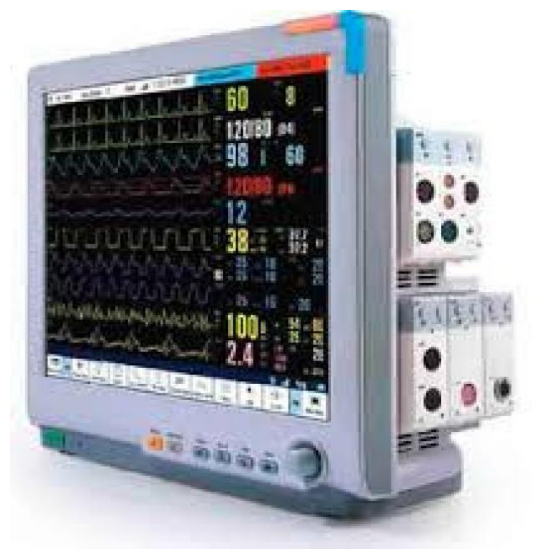

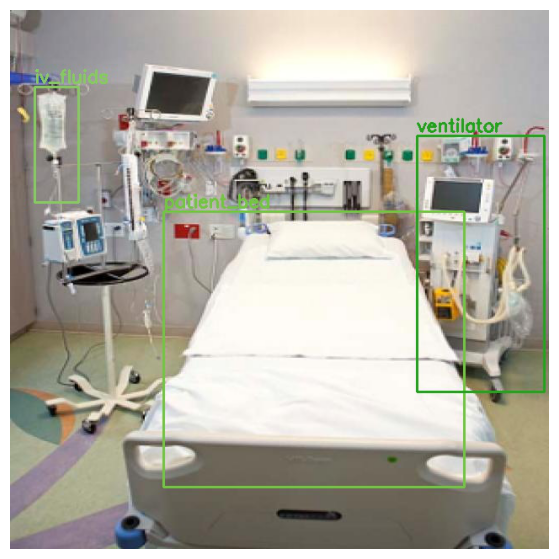

In [ ]:
results_dir_path = '/content/drive/MyDrive/faster_rcnn_custom/fastercnn-pytorch-training-pipeline/outputs/training/custom_training'
valid_images = glob.glob(f"{results_dir_path}/*.jpg")

for i in range(2):
    plt.figure(figsize=(10, 7))
    image = plt.imread(valid_images[i])
    plt.imshow(image)
    plt.axis('off')
    plt.show()


In [ ]:
#!python eval.py --weights outputs/training/custom_training/best_model.pth --config data_configs/custom_data.yaml --model fasterrcnn_resnet50_fpn_v2
!python eval.py --weights outputs/training/custom_training/best_model.pth --data data_configs/custom_data.yaml --model fasterrcnn_resnet50_fpn_v2


/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100% 15/15 [00:17<00:00,  1.20s/it]


{'map': tensor(0.2726),
 'map_50': tensor(0.5869),
 'map_75': tensor(0.2494),
 'map_large': tensor(0.2825),
 'map_medium': tensor(0.1468),
 'map_per_class': tensor(-1.),
 'map_small': tensor(-1.),
 'mar_1': tensor(0.3072),
 'mar_10': tensor(0.3822),
 'mar_100': tensor(0.3822),
 'mar_100_per_class': tensor(-1.),
 'mar_large': tensor(0.4024),
 'mar_medium': tensor(0.1607),
 'mar_small': tensor(-1.)}


In [ ]:
!python eval.py --weights outputs/training/custom_training/best_model.pth --data data_configs/custom_data.yaml --model fasterrcnn_resnet50_fpn_v2 --verbose


/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100% 15/15 [00:16<00:00,  1.11s/it]


{'map': tensor(0.2726),
 'map_50': tensor(0.5869),
 'map_75': tensor(0.2494),
 'map_large': tensor(0.2825),
 'map_medium': tensor(0.1468),
 'map_per_class': tensor([0.0000, 0.3497, 0.4779, 0.1194, 0.0623, 0.2022, 0.3923, 0.6029, 0.2545,
        0.2673, 0.2697]),
 'map_small': tensor(-1.),
 'mar_1': tensor(0.3072),
 'mar_10': tensor(0.3822),
 'mar_100': tensor(0.3822),
 'mar_100_per_class': tensor([0.0000, 0.4720, 0.5125, 0.2778, 0.2300, 0.2538, 0.5526, 0.6667, 0.4294,
        0.3250,

In [ ]:
!python inference.py --input example_test_data/img5.jpg --weights outputs/training/custom_training/best_model.pth


Building from model name arguments...
Test instances: 1
Image 1 done...
--------------------------------------------------
TEST PREDICTIONS COMPLETE
Average FPS: 0.605
